In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# HW 5
Goal is to find $P(signal|data)$ using bayes theorem: 
$$
P(signal|data) = \frac{P(data|signal)P(signal)}{P(data)}
$$

$P(signal|data)$ is the question.
$P(data|signal)$ is easy to determine: if we have a signal free background, we can inject fake signal at different strengths and then simulate observations in the presence of fake signals

$P(signal)$ is called a prior. It's the probability the signal has a particular strength. It can be used to great effect i.e. combining physics results from multiple experiments, however **It is the source of ~90% of statistical errors** almost always, you want to use a uniform prior: all injected signals have the same probability of occuring

$P(data)$ is the normalization factor that ensures $P(data|signal)$ integrates to 1

#### **Problem 1**
*Throw a signal free background: Use a normal distribution with modest $\sigma$ create a million background events*

In [158]:
bkgd = stats.norm.rvs(loc = 0, scale = 3, size = 1000000)

*Now create some signal between 0 and 20 using a uniform distribution.*

In [47]:
signal = stats.uniform.rvs(loc = 0, scale = 20, size = 1000000)
sample = bkgd + signal

Text(0.5, 0, 'Observed data, $P(d|s)$')

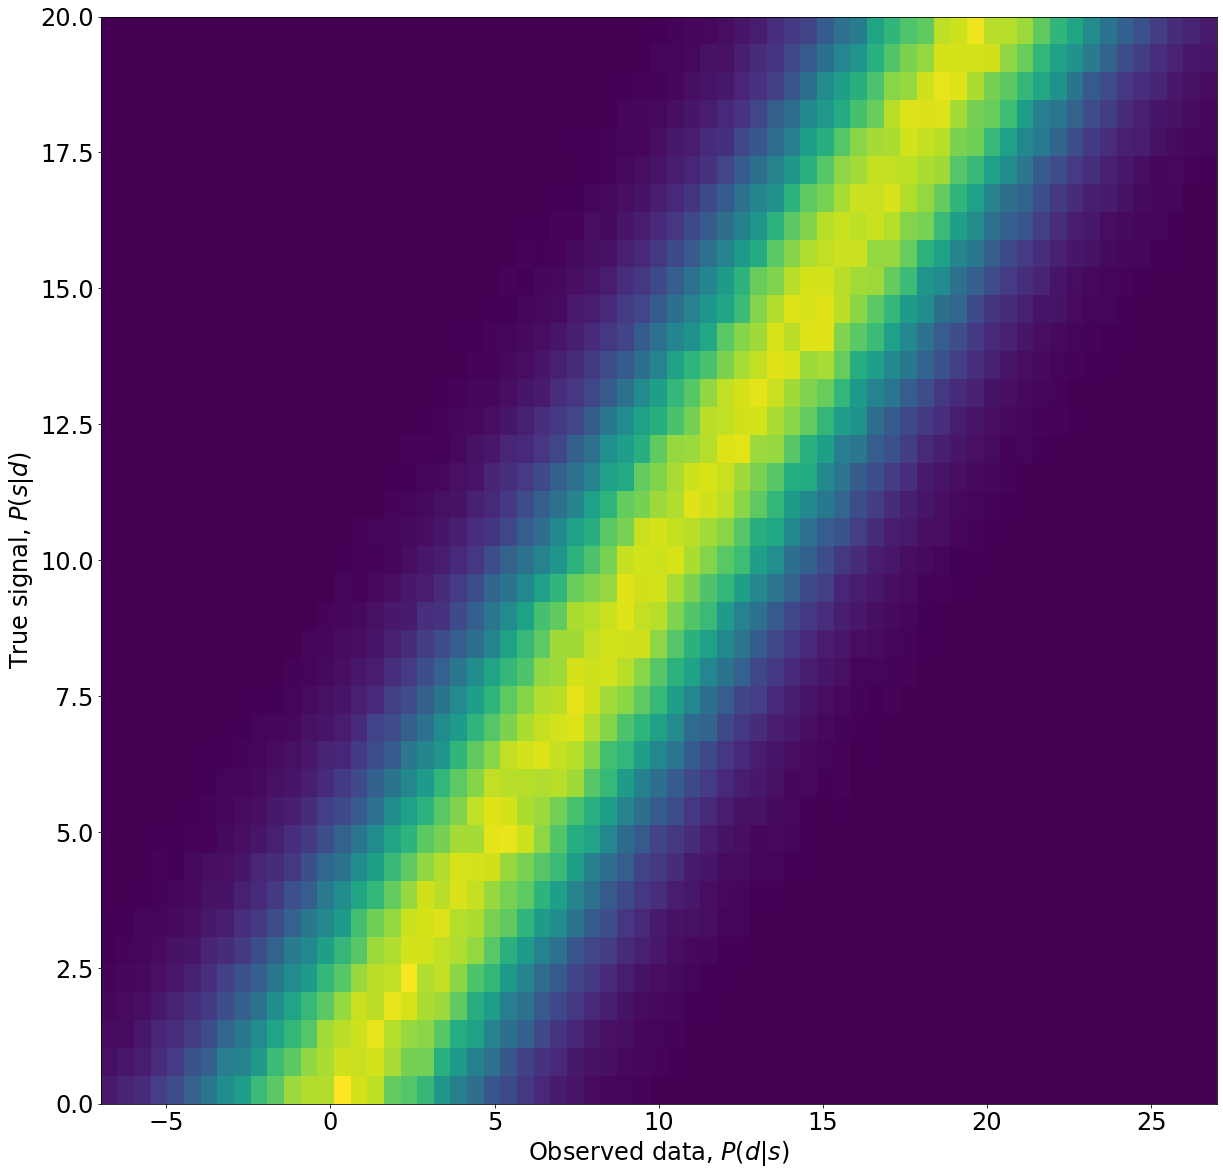

In [126]:
fig, ax = plt.subplots(1,1, figsize = (20,20))
plt.tick_params(labelsize = 24)

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

H, xedge, yedge, img = plt.hist2d(sample, signal, bins=[dataedges,signaledges])

plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

#### **Problem 1.b**
*Choose a ture injected signal and plot $P(d|s)$ label and clearly explain what the plot is and how to interpret it*

Text(0.5, 0, 'Observed signal')

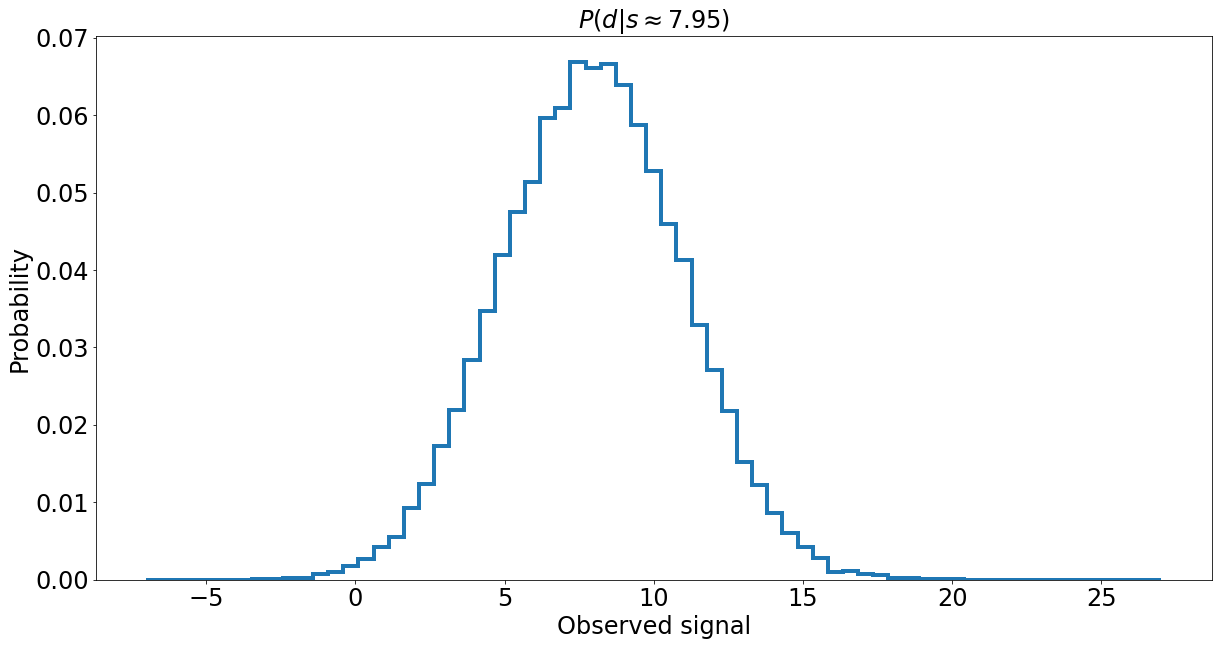

In [147]:
cut = 15 # The bin of H

signalCenters = (signaledges[:-1] + signaledges[1:])/2
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)
# Normalize the histogram
area = sum(H.T[cut,:])
normH = H.T[cut,:]/area

ax.stairs(normH, dataedges, linewidth = 4)
ax.set_title(f"$P(d|s \\approx {signalCenters[cut]:0.2f})$", fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("Observed signal", fontsize = 24)

This plot corresponds to a horizontal slice of the 2d histogram above around the value of True signal = 8. It is plotting the values in the bins corresponding to all the bins along that horizontal slice. This graph can be interpreted as the probability of an observed signal, given that the true signal was equal to 8. 

Text(0.5, 0, 'True signal')

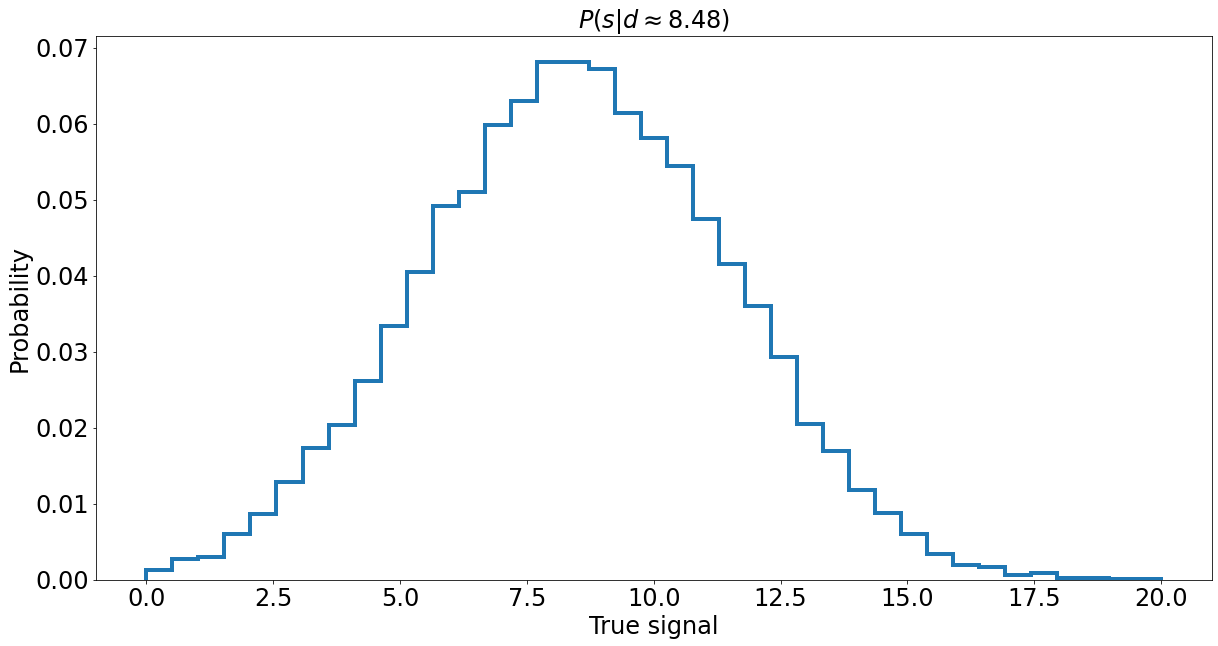

In [154]:
cut = 30 # The bin of H

dataCenters = (dataedges[:-1] + dataedges[1:])/2
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)
# Normalize the histogram
area = sum(H.T[:,cut])
normH = H.T[:,cut]/area

ax.stairs(normH, signaledges, linewidth = 4)
ax.set_title(f"$P(s|d \\approx {dataCenters[cut]:0.2f})$", fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("True signal", fontsize = 24)

This plot corresponds to a vertical slice of the above 2d histogram. The counts of the bins along the vertical slice are normalized in order to return probabilities corresponding to true signal values given an observed signal of 7. This graph can be interpreted as the probability of a true signal given a measurement of 7 i.e. $P(s|d = 7)$. This probability distribution corresponds to the one that we said we were searching for at the beginning of the lab.  

#### **Problem 2**
*Repeat 1b and 1c but this time use a background with a non-zero mean. Once the plots are made, plot them together. Why are they not centered on the same value? Explain carfully* 

In [174]:
# New background with shifted mean
bkgd = stats.norm.rvs(loc = 15, scale = 3, size = int(1e6))

In [234]:
signal = stats.uniform.rvs(loc = 0, scale = 40, size = 1000000)
data = bkgd + signal

Text(0.5, 0, 'Observed data, $P(d|s)$')

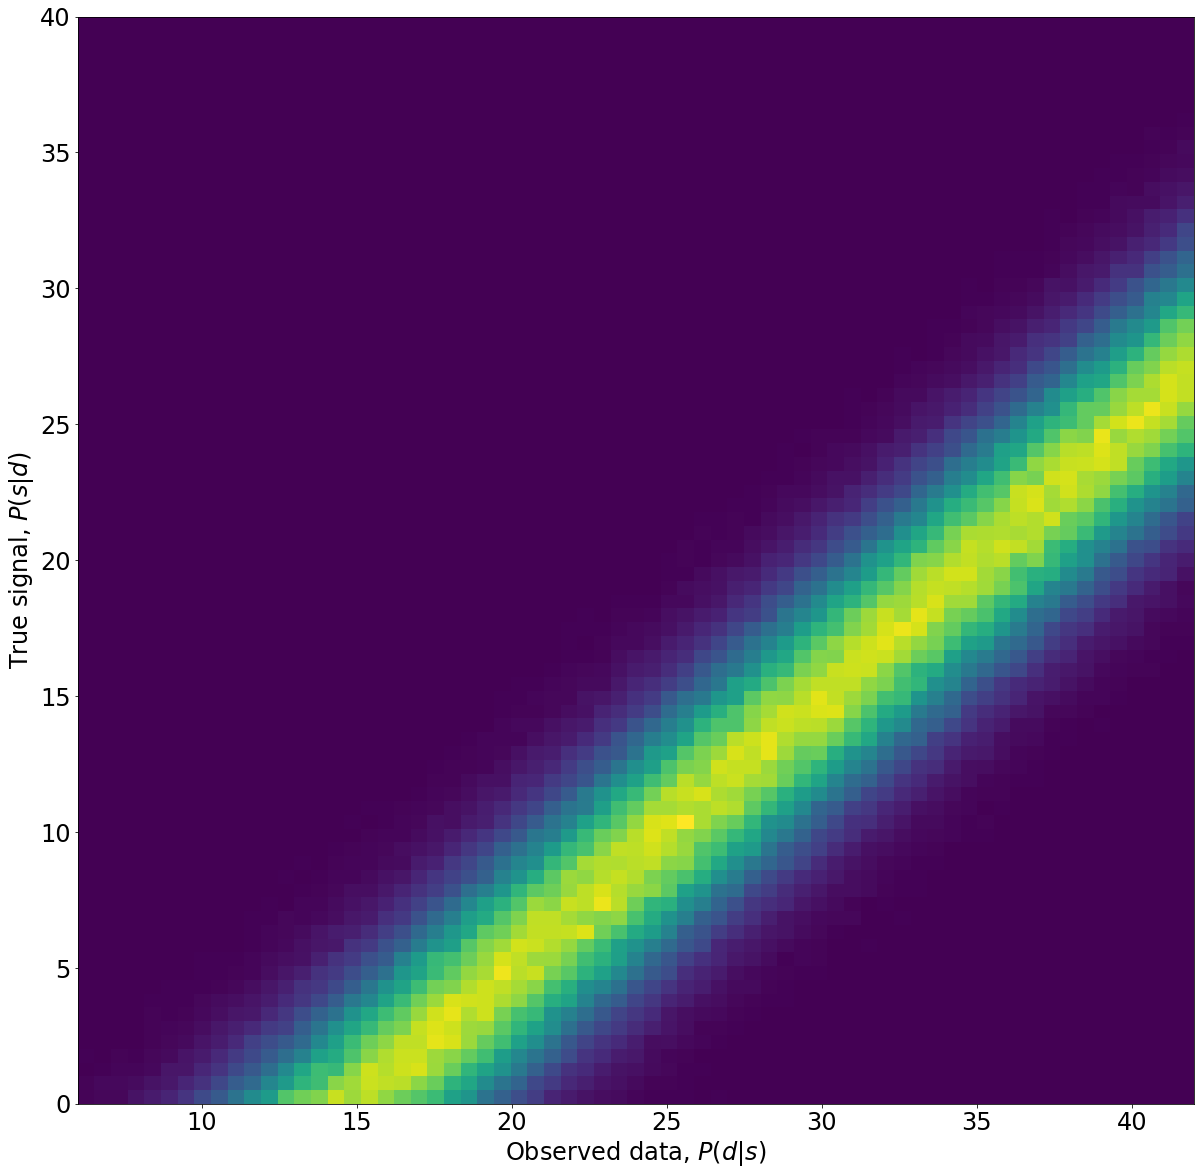

In [235]:
fig, ax = plt.subplots(1,1, figsize = (20,20))
plt.tick_params(labelsize = 24)

signaledges = np.linspace(0,40,80)
dataedges = np.linspace(6,42,68)

H, xedge, yedge, img = plt.hist2d(data, signal, bins=[dataedges,signaledges])

plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0.5, 0, 'Observed signal')

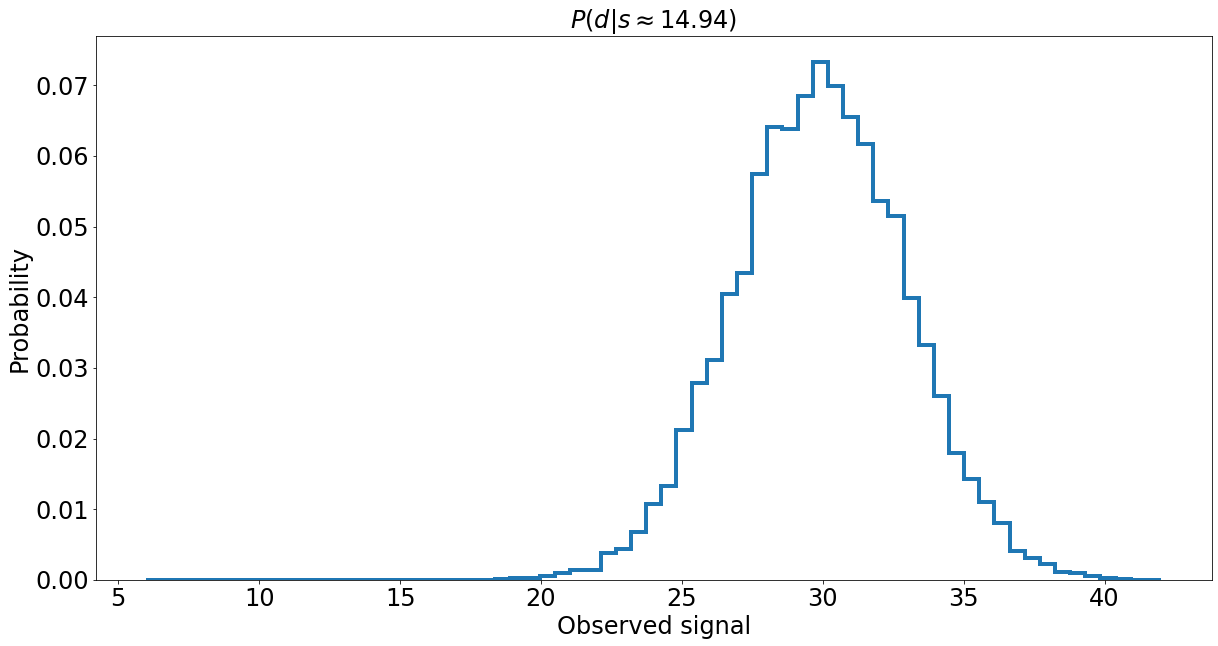

In [236]:
# Cut of Pds
cutPds = 29 # The bin of H

signalCenters = (signaledges[:-1] + signaledges[1:])/2
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)
# Normalize the histogram
area = sum(H.T[cutPds,:])
normPds = H.T[cutPds,:]/area

ax.stairs(normPds, dataedges, linewidth = 4)
ax.set_title(f"$P(d|s \\approx {signalCenters[cutPds]:0.2f})$", fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("Observed signal", fontsize = 24)

Text(0.5, 0, 'True signal')

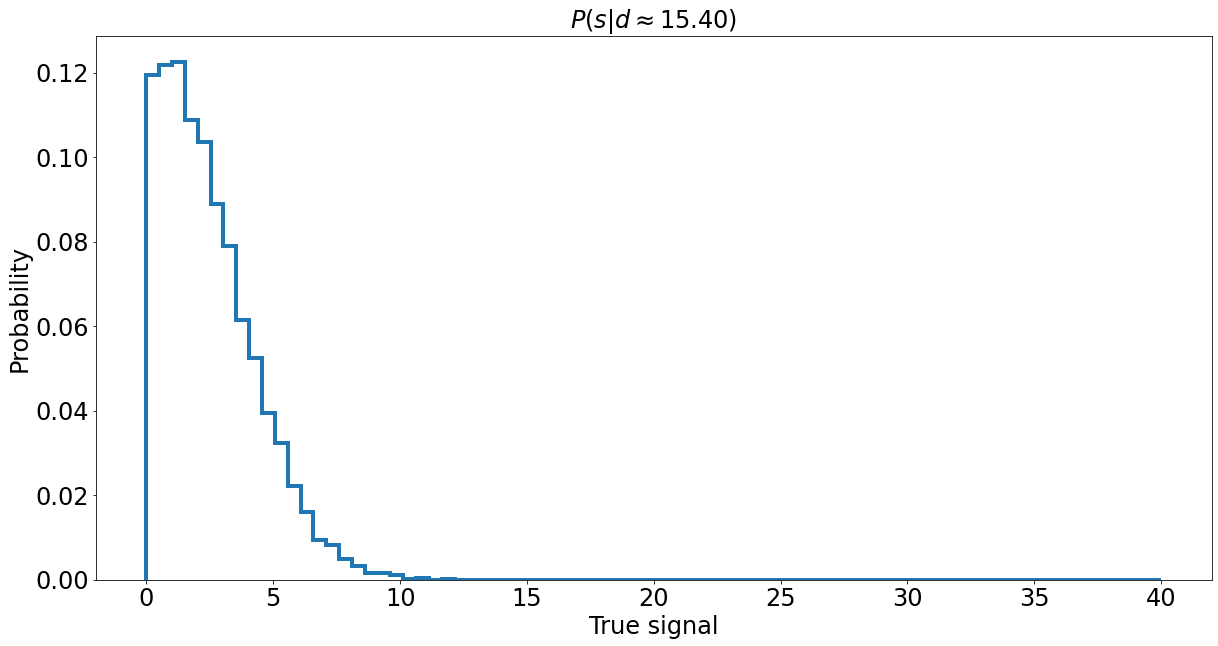

In [237]:
# Cut of Psd
cutPsd = 17 # The bin of H

dataCenters = (dataedges[:-1] + dataedges[1:])/2
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)
# Normalize the histogram
area = sum(H.T[:,cutPsd])
normPsd = H.T[:,cutPsd]/area

ax.stairs(normPsd, signaledges, linewidth = 4)
ax.set_title(f"$P(s|d \\approx {dataCenters[cutPsd]:0.2f})$", fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("True signal", fontsize = 24)

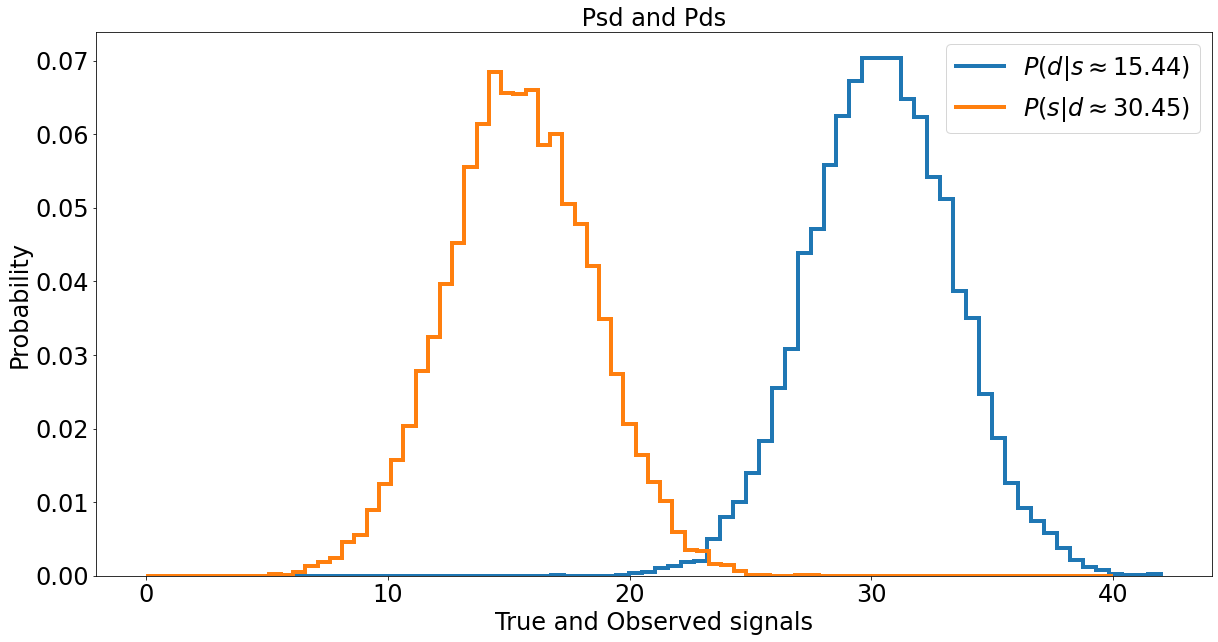

In [242]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
plt.tick_params(labelsize = 24)

cutPds = 30
cutPsd = 45

area = sum(H.T[:,cutPsd])
normPsd = H.T[:,cutPsd]/area

area = sum(H.T[cutPds,:])
normPds = H.T[cutPds,:]/area

ax.stairs(normPds, dataedges, linewidth = 4, label = f'$P(d|s \\approx {signalCenters[cutPds]:0.2f})$')
ax.stairs(normPsd, signaledges, linewidth = 4, label = f'$P(s|d \\approx {dataCenters[cutPsd]:0.2f})$')
ax.set_title(f" Psd and Pds ", fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("True and Observed signals", fontsize = 24)
ax.legend(fontsize = 24)

The above plot shows $P(d|s\approx 15.5)$ and $P(s|d\approx 15.5)$. The reason these plots do not overlie each other is because the mean of the observed distribution is at 15. This change in mean illustrates that we know something about the background and that the signal is likely to be much less than that. 